# Read large csv file and count occurances

CSV file is raw holdings file converted from SAS format

File must be transformed intos parse matrix

# Import statements

In [79]:
import csv
import collections
import feather
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
#from scipy import sparseimport 
import numpy as np

data_path = '../data/raw/'

holdings = load_data(data_path,'holdings')

In [3]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from data.basic_functions import * 

# Inspect file

In [118]:
data_path = '../data/raw/'

holdings = load_data(data_path,'holdings')

In [119]:
holdings.shape

(10000000, 6)

### Try to calculate more percent_tna values
Not really succesfull
Look for another method or just kill all these values

In [120]:
# Calc tna based on percent_tna and market value
holdings['calc_tna'] = holdings['market_val'] / holdings['percent_tna']

# replace inf in calc_tna with nan (caused by percent_tna = 0)
holdings['calc_tna'] = holdings['calc_tna'].replace([np.inf, -np.inf], np.nan)

In [121]:
# Calc mean calc_tna per fund/date pair
holdings_mean = holdings.groupby(['crsp_portno', 'report_dt'])[['calc_tna']].agg('mean')

# Merge mean calc_tna back into holdings table
holdings_mean = holdings_mean.reset_index()
holdings = holdings.merge(holdings_mean,how='left',on=['crsp_portno', 'report_dt'])

In [ ]:
# Calc calc_percent_tna 
holdings['calc_percent_tna'] = holdings['market_val'] / holdings['calc_tna_y']

In [170]:
holdings.loc[holdings['percent_tna'].notnull(),'calc_percent_tna'] = holdings['percent_tna']

In [174]:
holdings.sample(5)

,crsp_portno,report_dt,percent_tna,nbr_shares,market_val,crsp_company_key,calc_tna_x,calc_tna_y,calc_percent_tna
9319596,1003150,2007-10-31,NaN,1111.0,4.606206e+04,3002083,NaN,NaN,NaN
4102634,1001670,2008-08-31,0.260000,31418.0,4.339768e+06,3001394,1.669142e+07,1.636721e+07,0.260000
3714532,1001549,2009-03-31,0.050000,5350.0,1.110660e+05,3009155,2.221321e+06,2.102732e+06,0.050000
1855194,1001178,2003-09-30,0.037278,2800.0,9.898000e+04,3009171,2.655200e+06,2.655201e+06,0.037278
413760,1000830,2003-09-30,0.284646,40000.0,1.835200e+06,3007454,6.447300e+06,6.447302e+06,0.284646
9355176,1003186,2009-07-31,0.410000,13805.0,6.467342e+05,3283190,1.577401e+06,1.565510e+06,0.410000
917681,1000974,2009-04-30,0.010000,198000.0,1.764834e+05,3327726,1.764834e+07,1.235754e+07,0.010000
4651472,1001744,2008-09-30,0.010000,5500.0,6.446000e+04,3001343,6.446001e+06,6.867596e+06,0.010000
1945610,1001204,2010-03-31,0.050000,9415000.0,9.898545e+06,3253595,1.979710e+08,1.890192e+08,0.050000
8902956,1002953,2009-01-31,0.080000,3400.0,4.233000e+04,3009799,5.291251e+05,5.304714e+05,0.080000


In [172]:
# Show all for which percent_tna = NaN
holdings[np.isnan(holdings['calc_percent_tna'])].sample(100)

,crsp_portno,report_dt,percent_tna,nbr_shares,market_val,crsp_company_key,calc_tna_x,calc_tna_y,calc_percent_tna
7540995,1002428,2005-05-31,NaN,1044.0,11953.80,3011369,NaN,NaN,NaN
7705312,1002486,2006-01-31,NaN,12000.0,139800.00,3000578,NaN,NaN,NaN
7187886,1002331,2007-10-31,NaN,121700.0,3193408.00,3008626,NaN,NaN,NaN
725489,1000931,2007-01-31,NaN,1160000.0,41794800.00,3004779,NaN,NaN,NaN
4348478,1001696,2007-08-31,NaN,4600.0,256772.00,3003716,NaN,NaN,NaN
7707869,1002487,2005-08-31,NaN,103680.0,3930508.80,3008241,NaN,NaN,NaN
7374553,1002389,2004-02-29,NaN,660.0,12903.00,3001103,NaN,NaN,NaN
4075683,1001660,2005-10-31,NaN,54300.0,2676990.00,3004275,NaN,NaN,NaN
6683082,1002272,2004-11-30,NaN,1264.0,55906.72,3008961,NaN,NaN,NaN
3337828,1001520,2004-02-29,NaN,4700.0,75717.00,3000927,NaN,NaN,NaN


In [173]:
# Nans per col
holdings.isnull().sum(axis=0)

crsp_portno               0
report_dt                 0
percent_tna         1652795
nbr_shares                0
market_val                0
crsp_company_key          0
calc_tna_x          2361521
calc_tna_y          1509870
calc_percent_tna    1509829
dtype: int64

### Drop all fund/date pairs which have nas

# Find all unqiue Stocks and Portfolio/dates

In [2]:
def make_port_id(a,b):
    """
    Generate a unique ID from the portno and the date of a fund/date combination
    
    Input:
    - a: port_no
    - b: date
    
    Output:
    - port_ID
    """
    return int(100000 * a + b)


In [3]:
# Simple version
def extra_reader(reader_object):
    """
    Loops over rows of holdings csv
    Nedded to generate sparse matrix
    
    Input: 
    - a reader object linking to the holdings csv
    
    Output: 
    - port_ID: Collection of all unique fund/date combinations
    - stock_ID: Collection of all unique stocks
    """
    
    next(reader)
    stocks = collections.Counter()
    port_ID = collections.Counter()
    
    for row in reader_object:
        port_ID_str = make_port_id(int(float(row[0])),int(float(row[1])))
        port_ID[port_ID_str] += 1
        stocks[int(float(row[7]))] += 1

    return(port_ID,stocks)  

In [4]:
path = '../data/out_s.csv'

input_file = open(path)
reader = csv.reader(input_file, delimiter=',')

In [5]:
%%time
port_ID, stocks = extra_reader(reader)

CPU times: user 3min 42s, sys: 4.37 s, total: 3min 46s
Wall time: 3min 48s


In [ ]:
sum(port_ID.values())

# Create stock and port_no map

In [6]:
def make_unique_dict(counter):
    """
    Used to make a dictionary linking each fund/date combination 
    and each stock to a row/col in the sparse matrix
    
    Input:
    - collections.Counter() object
    
    Output:
    - dictionary
    """
    
    unique_keys = list(counter.keys())
    unique_keys_numbers = list(np.arange(len(unique_keys)))
    counter_map = dict(zip(unique_keys, unique_keys_numbers))
    
    return(counter_map)

In [7]:
stock_map = make_unique_dict(stocks)
port_no_map = make_unique_dict(port_ID)

In [15]:
total_number_rows = sum(list(stocks.values()))
print('Total number of rows in file:  {:,}'.format(total_number_rows))
print('Numer of unique stocks:        {:,}'.format(len(stocks.keys())))
print('Numer of unique portfolios:    {:,}'.format(len(port_no_map.keys())))

Total number of rows in file:  49,999,999
Numer of unique stocks:        785,608
Numer of unique portfolios:    224,257


# Set up sparse matrix

In [59]:
float('0,102600.0')

ValueError: could not convert string to float: '0,102600.0'

In [16]:
def gen_sparse_data(reader):
    """
    Loop over holdings csv file to collect the data for the sparse matrix
    
    Input:
    - reader: CSV holdings file
    
    Output:
    - sparse_row, sparse_col, sparse_data: three np arrays for the construction of the sparse matrix
    """
    next(reader)
    
    counter = 0
    
    sparse_row = np.zeros(total_number_rows)
    sparse_col = np.zeros(total_number_rows)
    sparse_data = np.zeros(total_number_rows)
    
    for row in reader:
        # Row
        port_ID = make_port_id(int(float(row[0])),int(float(row[1])))
        sparse_row[counter] = port_no_map[port_ID]

        # Col
        stock_num = int(float(row[7]))
        sparse_col[counter] = stock_map[stock_num]

        # Data
        try:
            sparse_data[counter] = float(row[4])
        except: 
            sparse_data[counter] = 0
            
        counter += 1
    
    sparse_row = sparse_row.astype(int)
    sparse_col = sparse_col.astype(int)
    
    return(sparse_row, sparse_col, sparse_data)

In [17]:
path = '../data/out_s.csv'
input_file = open(path)
reader = csv.reader(input_file, delimiter=',')

In [18]:
%%time
sparse_row, sparse_col, sparse_data = gen_sparse_data(reader)

CPU times: user 3min 56s, sys: 5.29 s, total: 4min 2s
Wall time: 4min 3s


In [20]:
sparse_matrix = sparse.coo_matrix((sparse_data, (sparse_row, sparse_col)))
print('{:,}'.format(sparse_matrix.sum()))
sparse_matrix

18,654,202.832358494


<224257x785608 sparse matrix of type '<class 'numpy.float64'>'
	with 49999999 stored elements in COOrdinate format>

# Check for duplicates
## Why not check simply the data???

In [56]:
def sp_unique(sp_matrix, axis=0):
    """
    Returns a sparse matrix with the unique rows (axis=0)
    or columns (axis=1) of an input sparse matrix sp_matrix
    """ 
    if axis == 1:
        sp_matrix = sp_matrix.T

    old_format = sp_matrix.getformat()
    dt = np.dtype(sp_matrix)
    ncols = sp_matrix.shape[1]

    if old_format != 'lil':
        sp_matrix = sp_matrix.tolil()

    _, ind = np.unique(sp_matrix.data + sp_matrix.rows, return_index=True)
    rows = sp_matrix.rows[ind]
    data = sp_matrix.data[ind]
    nrows_uniq = data.shape[0]

    sp_matrix = sparse.lil_matrix((nrows_uniq, ncols), dtype=dt)  #  or sp_matrix.resize(nrows_uniq, ncols)
    sp_matrix.data = data
    sp_matrix.rows = rows

    ret = sp_matrix.asformat(old_format)
    if axis == 1:
        ret = ret.T        
    return ret

In [57]:
sparse_matrix_unique = sp_unique(sparse_matrix, axis=0)

In [ ]:
sparse_matrix_unique = sparse.csr_matrix(sparse_matrix_unique)
print('{:,}'.format(sparse_matrix_unique.sum()))
sparse_matrix_unique.shape

In [ ]:
sparse_matrix.shape

In [ ]:
print('Total elements: {:,}'.format(sparse_matrix.shape[0] * sparse_matrix.shape[1]))

# Change to date

In [21]:
def split_port_id(num):
    start1 = int(np.floor(num / 10000))
    start2 = num - start1 * 10000
    return(start1,start2)

In [22]:
%%time
port_no = []
date = []
keys = list(port_no_map.keys())

for port_IDs in keys:
    left_temp, right_temp = split_port_id(port_IDs)
    port_no.append(left_temp)
    date.append(right_temp)
    
date = pd.to_timedelta(date, unit='D') + pd.Timestamp('1960-1-1')

CPU times: user 804 ms, sys: 23.5 ms, total: 828 ms
Wall time: 830 ms


In [23]:
sparse_info = pd.DataFrame(data={'port_no':port_no, 'date':date})

#### Check if dimensions match

In [24]:
sparse_info.shape

(224257, 2)

In [25]:
sparse_matrix.shape

(224257, 785608)

# Save data

In [ ]:
path = '../data/interim/'

stock_map
port_no_map

sparse_matrix

sparse_info

info = feather.read_dataframe(path)

In [ ]:
port_obj_map = dict(zip(info.port_ID, info.crsp_obj_cd))

# Analysis

### Row na dcolum sums

In [26]:
sparse_matrix.shape

(224257, 785608)

In [27]:
col_sums = sparse_matrix.sum(1)
row_sums = sparse_matrix.sum(0)

In [28]:
row_sums = pd.DataFrame(row_sums).T

In [29]:
row_sums.describe()

,0
count,785608.000000
mean,23.744925
std,480.400477
min,-5731.418212
25%,0.010000
50%,0.220000
75%,2.239999
max,117462.801786


In [31]:
col_sums = pd.DataFrame(col_sums)

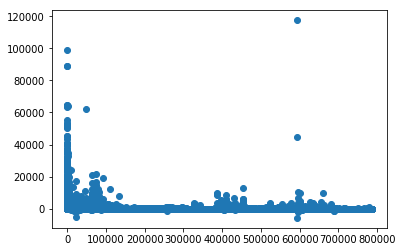

In [32]:
plt.plot(row_sums,'o')

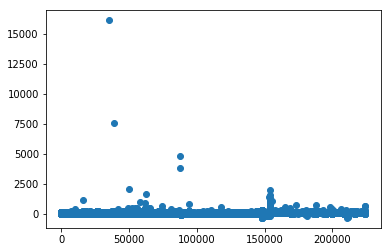

In [33]:
plt.plot(col_sums,'o')

### sparse_info

In [45]:
sparse_info.sample(5)

,port_no,date
26964,10009071,1979-05-15
104865,10048581,1982-07-15
202406,10217951,1983-08-15
141664,10186441,1982-02-12
78555,10030441,1981-02-12


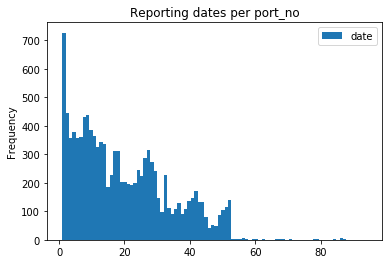

In [54]:
sparse_info.groupby('port_no').count().plot(kind='hist', bins=90, title= 'Reporting dates per port_no')

In [ ]:
sparse_info.groupby(['port_no','dates']).count().plot(kind='hist', title= 'Reporting dates per port_no')